## 練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)

In [1]:
import pandas as pd
import numpy as np

In [15]:
data = {'國家':['中國','美國','印度'] ,
        '人口': [13, 1, 10]}
data = pd.DataFrame(data)
print(data.head())
print('\n人口數最多的', data.iloc[data['人口'].idxmax()])

   國家  人口
0  中國  13
1  美國   1
2  印度  10

人口數最多的 國家    中國
人口    13
Name: 0, dtype: object


In [21]:
人口 = np.random.randint(10,size=3)
國家 = ['中國','美國','印度']
list_labels = ['國家','人口']
list_cols = [國家, 人口]
zipped = list(zip(list_labels, list_cols))
data2 = pd.DataFrame(dict(zipped))
print(data2.head())
print('\n人口數最多的', data2.iloc[data2['人口'].idxmax()])

   國家  人口
0  中國   6
1  美國   1
2  印度   1

人口數最多的 國家    中國
人口     6
Name: 0, dtype: object


## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [16]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [31]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
print(type(data))
data[0:100]

784594
<class 'str'>


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [32]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\nn'

data = data.split(split_tag)
print(len(data))
data[0]

9995


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

In [36]:
arrange_data = [i.split('\t', 1) for i in data]
col_name = ['id', 'url']

## 將 txt 轉成 pandas dataframe

In [37]:
import pandas as pd

df = pd.DataFrame(arrange_data, columns = col_name)
df.head()

,id,url
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

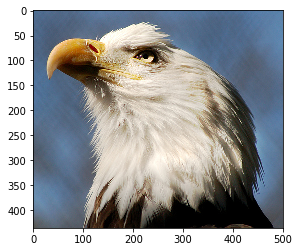

In [41]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0,'url']

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [52]:
def img2arr_fromURLs(url_list, resize = False):
    """
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    for url in url_list:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))    
        img_list = img.append()
    
    return img_list

In [53]:
result = img2arr_fromURLs(df.iloc[0:5, 1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()

AttributeError: 'JpegImageFile' object has no attribute 'append'

In [48]:
df.iloc[0:5, 1].values

array(['http://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
       'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
       'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
       'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
       'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg'],
      dtype=object)